# Task
Clean the dataset from `/content/remoteok_raw.csv` by handling missing values, removing duplicates, and standardizing text columns, then save the cleaned data to `remoteok_jobs_cleaned.csv`, and finally, provide a summary of the cleaning process and the resulting dataset.

## Load Data

### Subtask:
Load the `/content/remoteok_raw.csv` dataset into a pandas DataFrame.


**Reasoning**:
First, I'll import the pandas library to enable data manipulation, then load the CSV file into a DataFrame, and finally display its first few rows to confirm successful loading and inspect its structure.



In [2]:
import pandas as pd

df = pd.read_csv('/content/remoteok_raw.csv', encoding='latin1')
df.head()

,job_title,company,location,job_type,skills,date_posted,job_url
0,Coding Bootcampï¹£Job Guaranteed,Metana, Worldwide,5d,"No Tech Background Needed, Job or 100% Money Back",2026-01-02T09:06:50+00:00,https://remoteok.comhttps://remoteok.com/remot...
1,Full Stack Product Engineer,Jiga,United States,3d,"Senior, JavaScript, React, , , ,",2026-01-04T09:11:39+00:00,https://remoteok.comhttps://remoteok.com/remot...
2,Senior Software Engineer,Stellar AI,Europe,3d,"Developer, Train",2026-01-04T00:00:08+00:00,https://remoteok.comhttps://remoteok.com/remot...
3,Customer Support Specialist,Front, Probably worldwide,10m,"Salesforce, Technical, Support, , , ,",2026-01-07T08:00:39+00:00,https://remoteok.comhttps://remoteok.com/remot...
4,Quality Assurance Engineer Manual,Elligint Health,Upgrade to Premium to see salary,11m,"Testing, Test, Medical, , ,",2026-01-07T08:00:32+00:00,https://remoteok.comhttps://remoteok.com/remot...


## Handle Missing Values

### Subtask:
Identify and handle missing values, specifically replacing 'N/A' strings with pandas' default NaN and then deciding on a strategy (e.g., dropping or filling) for these NaNs.


**Reasoning**:
I will replace all occurrences of 'N/A' with `pd.NA` to standardize missing value representation, then calculate and display the total number of missing values for each column to understand the missing data landscape.



In [3]:
df = df.replace('N/A', pd.NA)
print("Missing values after replacing 'N/A' with pd.NA:")
print(df.isnull().sum())

Missing values after replacing 'N/A' with pd.NA:
job_title       0
company         0
location        0
job_type        0
skills         38
date_posted     0
job_url         0
dtype: int64


**Reasoning**:
Since only the 'skills' column has missing values, I will fill these missing values with an empty string to maintain data integrity without dropping valuable rows, as an empty skill list is a valid representation.



In [4]:
df['skills'] = df['skills'].fillna('')
print("Missing values after filling 'skills' column:")
print(df.isnull().sum())

Missing values after filling 'skills' column:
job_title      0
company        0
location       0
job_type       0
skills         0
date_posted    0
job_url        0
dtype: int64


## Remove Duplicates

### Subtask:
Remove any duplicate rows from the DataFrame to ensure data uniqueness.


**Reasoning**:
I will remove duplicate rows from the DataFrame `df` and then print the number of rows before and after the operation to confirm the change.



In [5]:
print(f"Number of rows before removing duplicates: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows before removing duplicates: 1038
Number of rows after removing duplicates: 1038


## Standardize Text Columns

### Subtask:
Iterate through appropriate object/string columns, convert text to lowercase, and strip leading/trailing whitespace to standardize text data.


**Reasoning**:
I will identify the text columns to standardize, then apply lowercase conversion and whitespace stripping to each of them, and finally display the updated DataFrame head to verify the changes.



In [6]:
text_columns = ['job_title', 'company', 'location', 'job_type', 'skills']

for col in text_columns:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.lower().str.strip()

df.head()

,job_title,company,location,job_type,skills,date_posted,job_url
0,coding bootcampï¹£job guaranteed,metana, worldwide,5d,"no tech background needed, job or 100% money back",2026-01-02T09:06:50+00:00,https://remoteok.comhttps://remoteok.com/remot...
1,full stack product engineer,jiga,united states,3d,"senior, javascript, react, , , ,",2026-01-04T09:11:39+00:00,https://remoteok.comhttps://remoteok.com/remot...
2,senior software engineer,stellar ai,europe,3d,"developer, train",2026-01-04T00:00:08+00:00,https://remoteok.comhttps://remoteok.com/remot...
3,customer support specialist,front, probably worldwide,10m,"salesforce, technical, support, , , ,",2026-01-07T08:00:39+00:00,https://remoteok.comhttps://remoteok.com/remot...
4,quality assurance engineer manual,elligint health,upgrade to premium to see salary,11m,"testing, test, medical, , ,",2026-01-07T08:00:32+00:00,https://remoteok.comhttps://remoteok.com/remot...


## Save Cleaned Data

### Subtask:
Save the cleaned and normalized DataFrame to a new CSV file named `remoteok_jobs_cleaned.csv`.


**Reasoning**:
I will save the cleaned DataFrame `df` to a CSV file named `remoteok_jobs_cleaned.csv`, ensuring the index is not written to the file to maintain a clean dataset.



In [7]:
df.to_csv('remoteok_jobs_cleaned.csv', index=False)
print("Cleaned data saved to 'remoteok_jobs_cleaned.csv'")

Cleaned data saved to 'remoteok_jobs_cleaned.csv'


## Print Summary Statistics

### Subtask:
Print summary statistics including the total number of jobs (rows) in the cleaned DataFrame and the count of missing values for each column.


**Reasoning**:
I will print the total number of rows in the DataFrame to represent the total jobs, and then display the count of missing values for each column to confirm data cleanliness.



In [8]:
print(f"Total number of jobs (rows) in the cleaned DataFrame: {len(df)}")
print("Missing values after cleaning:")
print(df.isnull().sum())

Total number of jobs (rows) in the cleaned DataFrame: 1038
Missing values after cleaning:
job_title      0
company        0
location       0
job_type       0
skills         0
date_posted    0
job_url        0
dtype: int64


# Task
Perform initial data analysis on the `remoteok_jobs_cleaned.csv` dataset, which includes parsing date information from the `date_posted` column, extracting keywords from the `skills` and `job_title` columns, analyzing categorical variables such as `location`, `company`, and `job_type`, visualizing key insights like job posting trends, top skills, and top locations, and finally, summarizing the findings.

## Load Cleaned Data

### Subtask:
Load the cleaned dataset from `remoteok_jobs_cleaned.csv` into a pandas DataFrame.


**Reasoning**:
I will import the pandas library, then load the cleaned CSV file into a DataFrame, and finally display its first few rows to confirm successful loading and inspect its structure.



In [9]:
import pandas as pd

df = pd.read_csv('remoteok_jobs_cleaned.csv')
df.head()

,job_title,company,location,job_type,skills,date_posted,job_url
0,coding bootcampï¹£job guaranteed,metana, worldwide,5d,"no tech background needed, job or 100% money back",2026-01-02T09:06:50+00:00,https://remoteok.comhttps://remoteok.com/remot...
1,full stack product engineer,jiga,united states,3d,"senior, javascript, react, , , ,",2026-01-04T09:11:39+00:00,https://remoteok.comhttps://remoteok.com/remot...
2,senior software engineer,stellar ai,europe,3d,"developer, train",2026-01-04T00:00:08+00:00,https://remoteok.comhttps://remoteok.com/remot...
3,customer support specialist,front, probably worldwide,10m,"salesforce, technical, support, , , ,",2026-01-07T08:00:39+00:00,https://remoteok.comhttps://remoteok.com/remot...
4,quality assurance engineer manual,elligint health,upgrade to premium to see salary,11m,"testing, test, medical, , ,",2026-01-07T08:00:32+00:00,https://remoteok.comhttps://remoteok.com/remot...


In [20]:
df.size

13494

In [21]:
df.shape

(1038, 13)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   job_title            1038 non-null   object             
 1   company              1038 non-null   object             
 2   location             1038 non-null   object             
 3   job_type             1038 non-null   object             
 4   skills               1000 non-null   object             
 5   date_posted          1038 non-null   datetime64[ns, UTC]
 6   job_url              1038 non-null   object             
 7   year                 1038 non-null   int32              
 8   month                1038 non-null   int32              
 9   day                  1038 non-null   int32              
 10  date_posted_month    1038 non-null   period[M]          
 11  location_normalized  1038 non-null   object             
 12  date_posted_ym      

In [23]:
df.describe()

,year,month,day
count,1038.000000,1038.000000,1038.000000
mean,2025.044316,10.323699,16.483622
std,0.205895,2.189930,9.357427
min,2025.000000,1.000000,1.000000
25%,2025.000000,10.000000,7.000000
50%,2025.000000,10.500000,17.000000
75%,2025.000000,12.000000,24.000000
max,2026.000000,12.000000,31.000000


In [24]:
df.columns

Index(['job_title', 'company', 'location', 'job_type', 'skills', 'date_posted',
       'job_url', 'year', 'month', 'day', 'date_posted_month',
       'location_normalized', 'date_posted_ym'],
      dtype='object')

## Parse Date Information

### Subtask:
Convert the `date_posted` column to datetime objects and extract relevant time-based features such as year, month, and day.


**Reasoning**:
I will convert the 'date_posted' column to datetime objects and extract the year, month, and day into new columns, then display the first few rows of the DataFrame to verify the changes.



In [10]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['year'] = df['date_posted'].dt.year
df['month'] = df['date_posted'].dt.month
df['day'] = df['date_posted'].dt.day
df.head()

,job_title,company,location,job_type,skills,date_posted,job_url,year,month,day
0,coding bootcampï¹£job guaranteed,metana, worldwide,5d,"no tech background needed, job or 100% money back",2026-01-02 09:06:50+00:00,https://remoteok.comhttps://remoteok.com/remot...,2026,1,2
1,full stack product engineer,jiga,united states,3d,"senior, javascript, react, , , ,",2026-01-04 09:11:39+00:00,https://remoteok.comhttps://remoteok.com/remot...,2026,1,4
2,senior software engineer,stellar ai,europe,3d,"developer, train",2026-01-04 00:00:08+00:00,https://remoteok.comhttps://remoteok.com/remot...,2026,1,4
3,customer support specialist,front, probably worldwide,10m,"salesforce, technical, support, , , ,",2026-01-07 08:00:39+00:00,https://remoteok.comhttps://remoteok.com/remot...,2026,1,7
4,quality assurance engineer manual,elligint health,upgrade to premium to see salary,11m,"testing, test, medical, , ,",2026-01-07 08:00:32+00:00,https://remoteok.comhttps://remoteok.com/remot...,2026,1,7


## Extract Keywords from Text Columns

### Subtask:
Process the `skills` and `job_title` columns to extract relevant keywords, which can be useful for identifying common technologies and roles.


**Reasoning**:
The previous error 'AttributeError: 'float' object has no attribute 'split'' occurred because some entries in the 'skills' column were of type float (NaN) despite earlier `fillna('')` attempts, causing string methods to fail. To fix this, I will explicitly convert the 'skills' column to string type before iterating and add a check to skip 'nan' or empty strings.



In [13]:
import nltk
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import pandas as pd

stop_words = set(stopwords.words('english'))

all_skills = []
for skill_list in df['skills'].astype(str):
    # Handle cases where the string might be 'nan' after conversion from float NaN or empty string
    if skill_list.lower() == 'nan' or skill_list == '':
        continue
    skills = [s.strip() for s in skill_list.split(',') if s.strip() and len(s.strip()) > 1]
    all_skills.extend(skills)


all_job_title_keywords = []
for title in df['job_title'].astype(str):
    # Handle cases where the string might be 'nan' after conversion from float NaN or empty string
    if title.lower() == 'nan' or title == '':
        continue
    # Remove non-alphabetic characters and split into words
    words = re.findall(r'\b[a-z]+\b', title.lower())
    # Remove stopwords and single-character words
    words = [word for word in words if word not in stop_words and len(word) > 1]
    all_job_title_keywords.extend(words)

skills_series = pd.Series(all_skills)
job_title_keywords_series = pd.Series(all_job_title_keywords)

print("NLTK stopwords loaded successfully.")
print("Skills keywords extracted. First 5: ")
print(skills_series.head())
print("Job Title keywords extracted. First 5: ")
print(job_title_keywords_series.head())

NLTK stopwords loaded successfully.
Skills keywords extracted. First 5: 
0    no tech background needed
1       job or 100% money back
2                       senior
3                   javascript
4                        react
dtype: object
Job Title keywords extracted. First 5: 
0        coding
1           job
2    guaranteed
3          full
4         stack
dtype: object


## Analyze Categorical Variables

### Subtask:
Perform frequency analysis on categorical columns like `location`, `company`, and `job_type` to understand their distributions.


**Reasoning**:
I will perform frequency analysis on the 'location', 'company', and 'job_type' columns by calculating and printing the value counts for each, showing the top 10 for 'location' and 'company', and all for 'job_type'.



In [14]:
print("Frequency analysis for 'location' column (Top 10):")
print(df['location'].value_counts().head(10))
print("\nFrequency analysis for 'company' column (Top 10):")
print(df['company'].value_counts().head(10))
print("\nFrequency analysis for 'job_type' column (All unique types):")
print(df['job_type'].value_counts())

Frequency analysis for 'location' column (Top 10):
location
upgrade to premium to see salary    273
 probably worldwide                141
united states                        72
san francisco                        33
new york                             16
 worldwide                          15
remote - us                          14
remote, united states                12
remote - united states               11
texas                                10
Name: count, dtype: int64

Frequency analysis for 'company' column (Top 10):
company
mindsquare ag            15
tech innovations inc.    13
jobgether                10
infstones                 8
invisible agency          8
avalere health            8
infuse                    7
bitmex                    7
anchorage digital         7
1inch                     7
Name: count, dtype: int64

Frequency analysis for 'job_type' column (All unique types):
job_type
2mo    353
3mo    346
1mo     60
25d     23
15d     21
26d     19
22d     18
2

## Visualize Key Insights

### Subtask:
Generate visualizations to display trends in job postings over time, top skills, and top locations to derive initial insights. Ensure plots include appropriate labels and legends.


**Reasoning**:
I will import the necessary libraries for plotting, then generate three visualizations: a line plot for job posting trends over time, a bar plot for the top 10 skills, and a bar plot for the top 10 locations, ensuring all plots have appropriate labels, legends, and titles as specified.



/tmp/ipython-input-434799355.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date_posted_month'] = df['date_posted'].dt.to_period('M')


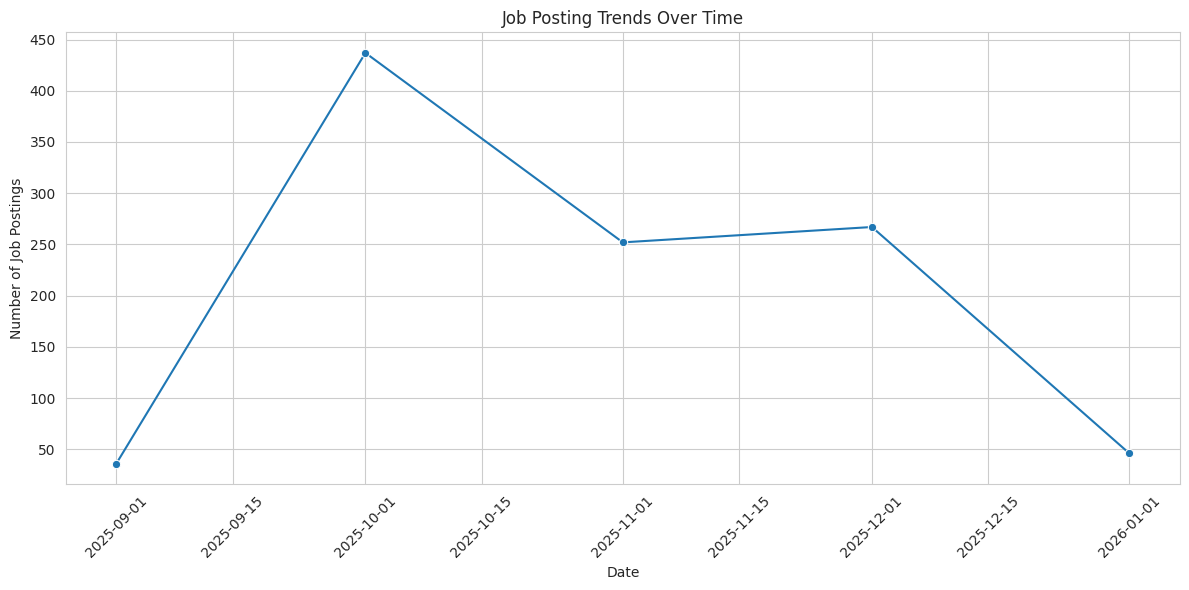

/tmp/ipython-input-434799355.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.index, y=top_skills.values, palette='viridis')


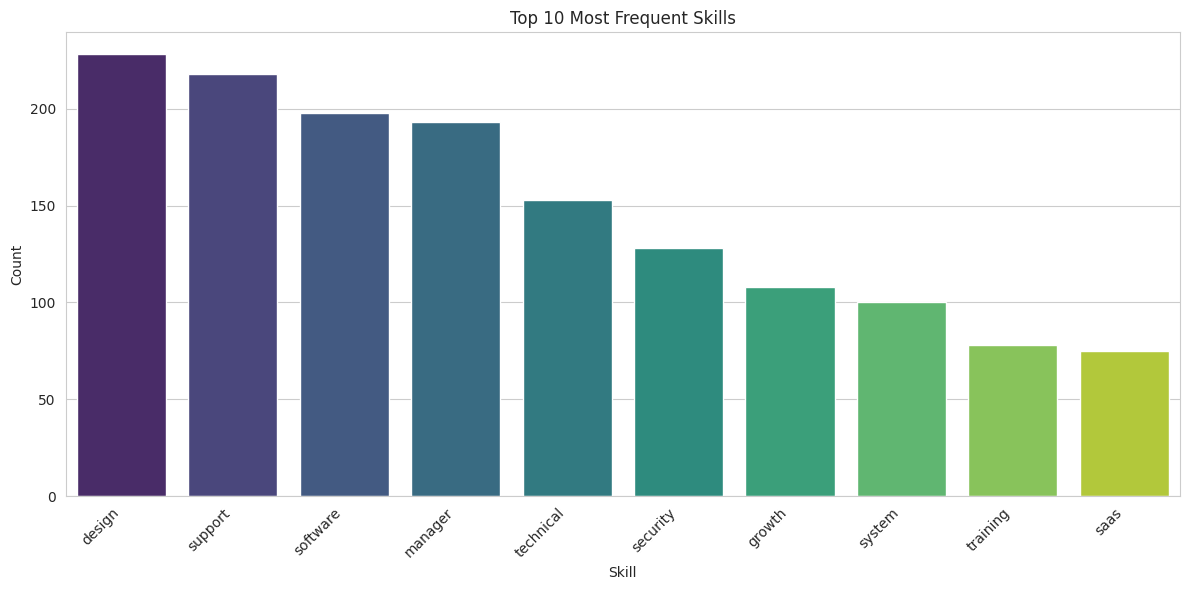

/tmp/ipython-input-434799355.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='magma')
/tmp/ipython-input-434799355.py:44: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


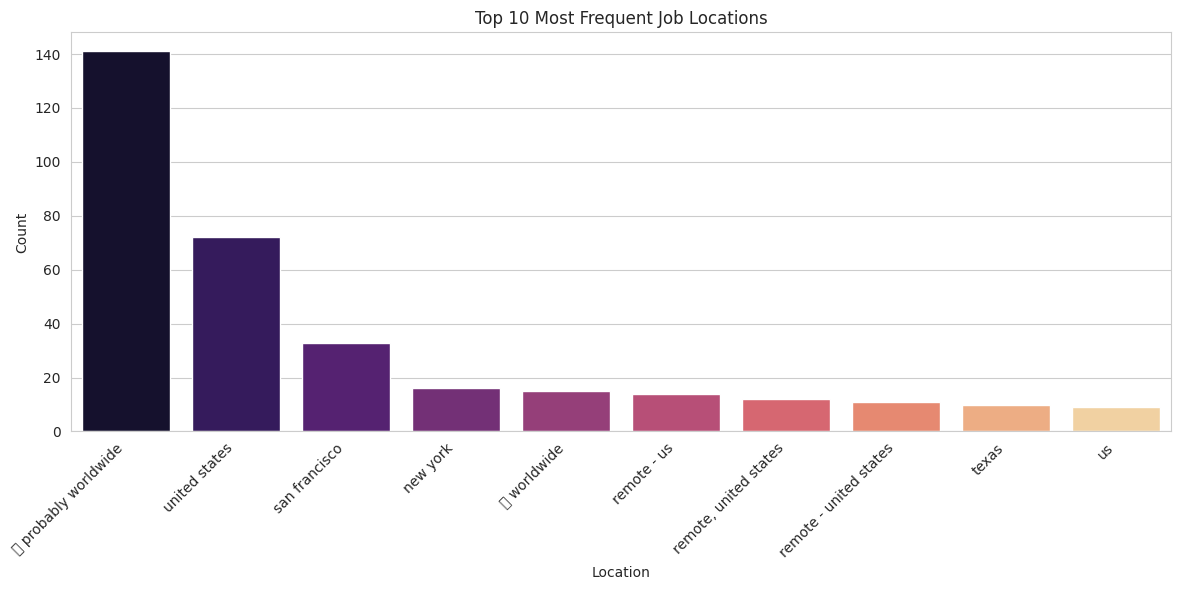

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1. Job Posting Trends Over Time
df['date_posted_month'] = df['date_posted'].dt.to_period('M')
job_trends = df.groupby('date_posted_month').size().reset_index(name='count')
job_trends['date_posted_month'] = job_trends['date_posted_month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date_posted_month', y='count', data=job_trends, marker='o')
plt.title('Job Posting Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top Skills
top_skills = skills_series.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.index, y=top_skills.values, palette='viridis')
plt.title('Top 10 Most Frequent Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Top Locations
# Filter out generic locations for a more meaningful analysis, if they are dominant
filtered_locations = df['location'][~df['location'].isin(['upgrade to premium to see salary', 'probably worldwide', 'worldwide'])]
top_locations = filtered_locations.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='magma')
plt.title('Top 10 Most Frequent Job Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `UserWarning` regarding a missing glyph due to special characters in the 'location' column, and the filtering of generic locations was not entirely effective. I will first preprocess the 'location' column to remove non-ASCII characters and then use the cleaned column for filtering and plotting. Additionally, I will address the `FutureWarning` by explicitly setting the `hue` argument in `sns.barplot` for better practice.



/tmp/ipython-input-4065641970.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date_posted_month'] = df['date_posted'].dt.to_period('M')


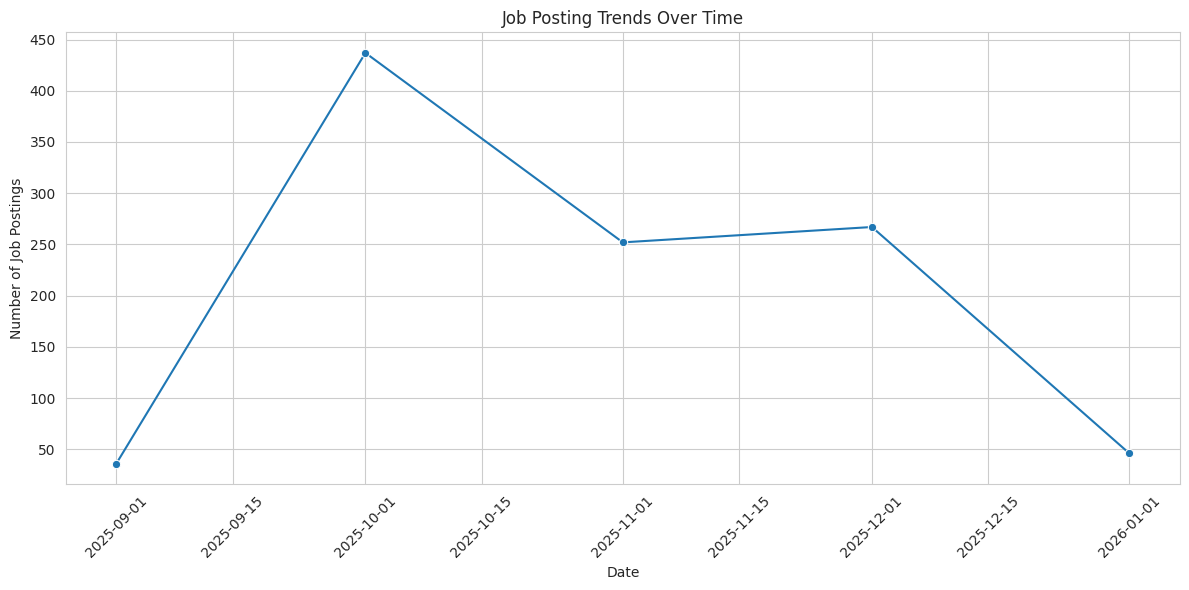

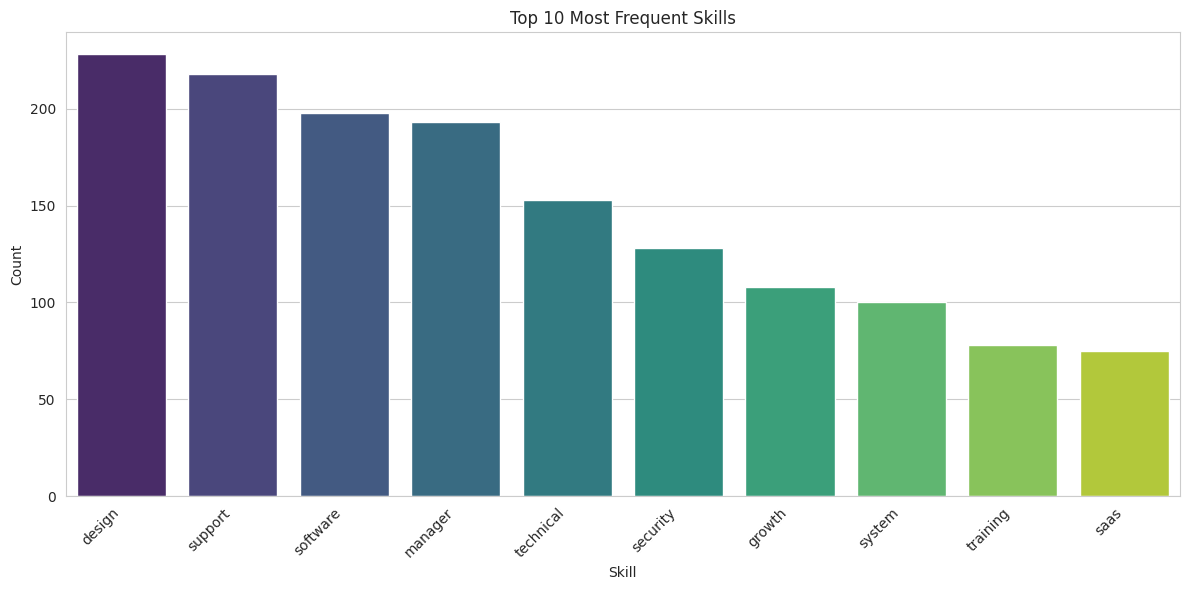

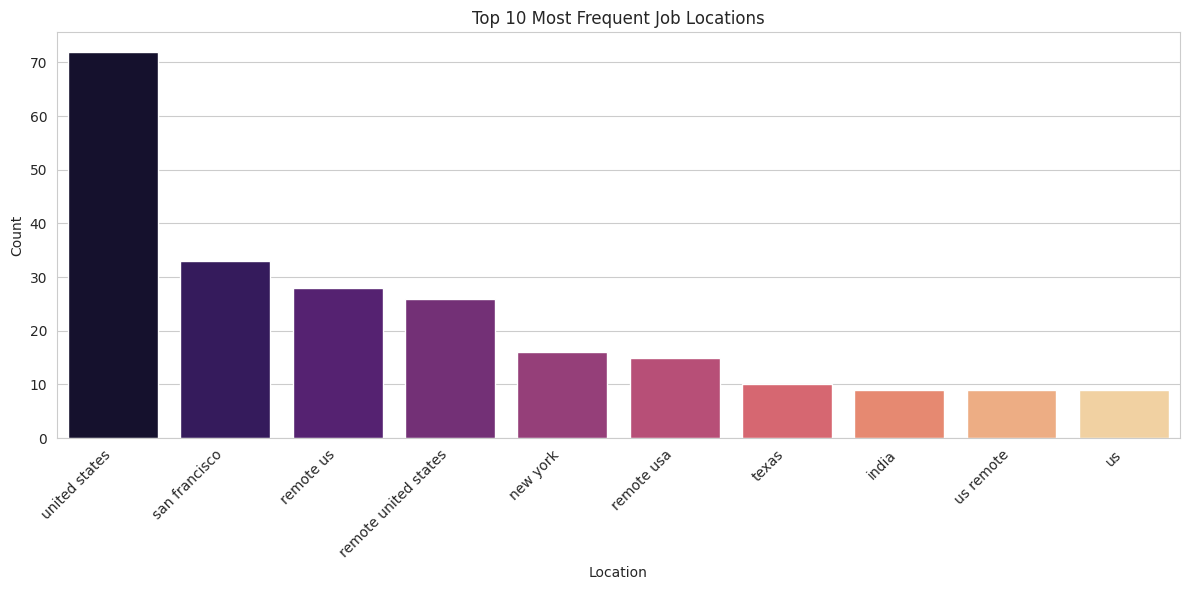

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set plot style
sns.set_style("whitegrid")

# 1. Job Posting Trends Over Time
df['date_posted_month'] = df['date_posted'].dt.to_period('M')
job_trends = df.groupby('date_posted_month').size().reset_index(name='count')
job_trends['date_posted_month'] = job_trends['date_posted_month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date_posted_month', y='count', data=job_trends, marker='o')
plt.title('Job Posting Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top Skills
top_skills = skills_series.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.index, y=top_skills.values, hue=top_skills.index, palette='viridis', legend=False)
plt.title('Top 10 Most Frequent Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Top Locations
# Function to clean location strings (remove non-ASCII characters and extra spaces)
def clean_location(location_str):
    if isinstance(location_str, str):
        cleaned = re.sub(r'[\W_]+', ' ', location_str) # Replace non-alphanumeric (including special characters) with space
        cleaned = re.sub(r'\s+', ' ', cleaned).strip() # Replace multiple spaces with single space and strip
        return cleaned.lower()
    return location_str

df['location_normalized'] = df['location'].apply(clean_location)

# Filter out generic locations for a more meaningful analysis
generic_locations = ['upgrade to premium to see salary', 'probably worldwide', 'worldwide']
filtered_locations_normalized = df[~df['location_normalized'].isin(generic_locations)]['location_normalized']
top_locations = filtered_locations_normalized.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, hue=top_locations.index, palette='magma', legend=False)
plt.title('Top 10 Most Frequent Job Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `UserWarning` about a missing glyph due to non-ASCII characters in the 'location' column, even after filtering. I will enhance the `clean_location` function to explicitly remove non-ASCII characters using `encode('ascii', 'ignore')` and ensure generic locations are cleaned consistently before filtering to fully address the warning.



/tmp/ipython-input-3081610372.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date_posted_month'] = df['date_posted'].dt.to_period('M')


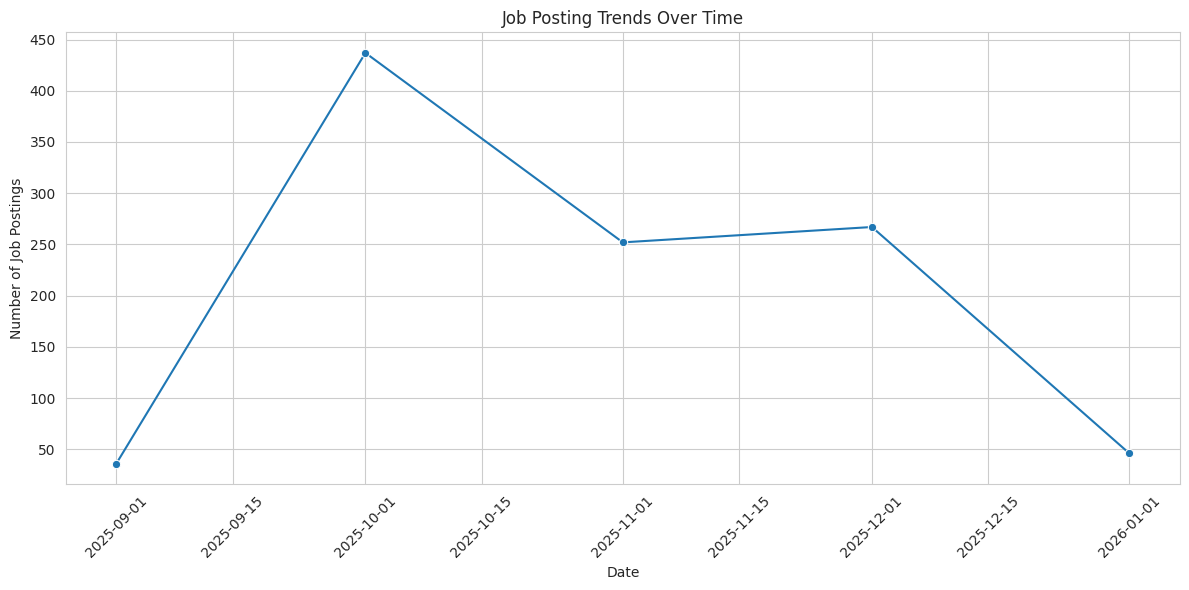

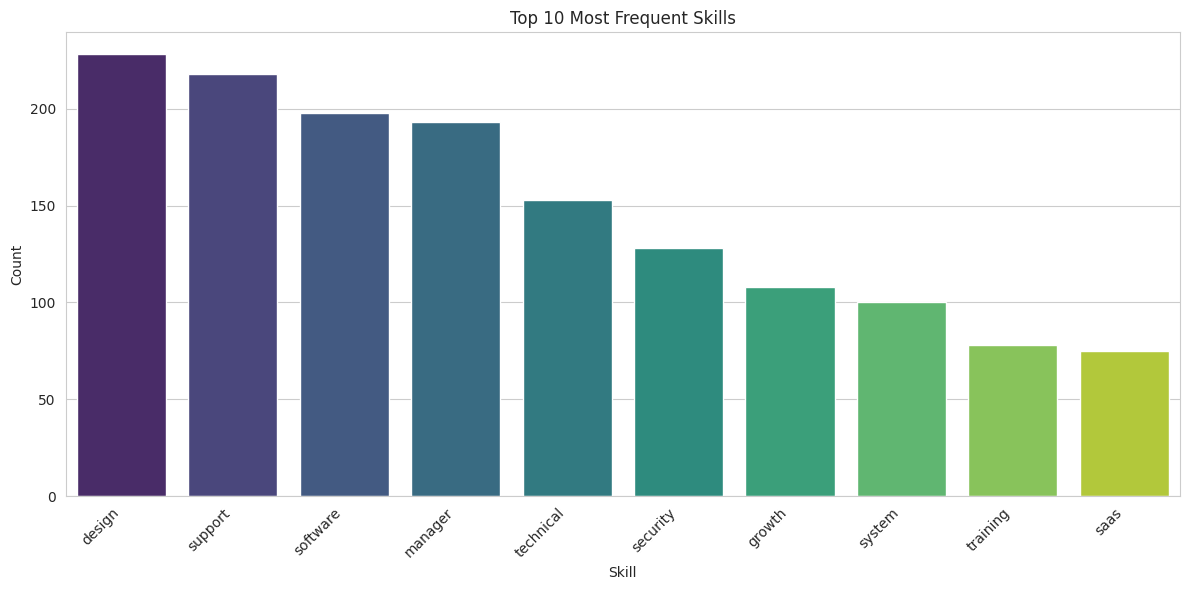

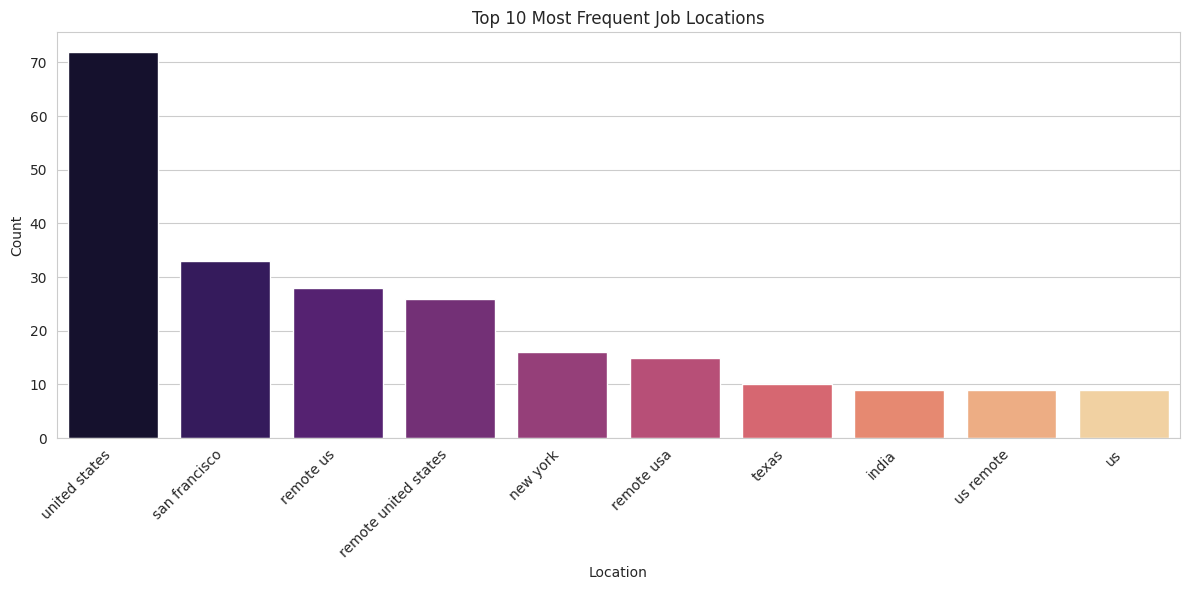

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set plot style
sns.set_style("whitegrid")

# 1. Job Posting Trends Over Time
df['date_posted_month'] = df['date_posted'].dt.to_period('M')
job_trends = df.groupby('date_posted_month').size().reset_index(name='count')
job_trends['date_posted_month'] = job_trends['date_posted_month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date_posted_month', y='count', data=job_trends, marker='o')
plt.title('Job Posting Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top Skills
top_skills = skills_series.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.index, y=top_skills.values, hue=top_skills.index, palette='viridis', legend=False)
plt.title('Top 10 Most Frequent Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Top Locations
# Function to clean location strings (remove non-ASCII characters and extra spaces)
def clean_location(location_str):
    if isinstance(location_str, str):
        # Explicitly remove non-ASCII characters by encoding/decoding
        cleaned = location_str.encode('ascii', 'ignore').decode('ascii')
        cleaned = re.sub(r'[\W_]+', ' ', cleaned) # Replace non-alphanumeric (including special characters) with space
        cleaned = re.sub(r'\s+', ' ', cleaned).strip() # Replace multiple spaces with single space and strip
        return cleaned.lower()
    return location_str

# Apply the enhanced cleaning function
df['location_normalized'] = df['location'].apply(clean_location)

# Filter out generic locations for a more meaningful analysis
# Ensure generic_locations are also cleaned using the same function for consistent comparison
generic_locations_cleaned = [clean_location(loc) for loc in ['upgrade to premium to see salary', 'probably worldwide', 'worldwide']]
filtered_locations_normalized = df[~df['location_normalized'].isin(generic_locations_cleaned)]['location_normalized']
top_locations = filtered_locations_normalized.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, hue=top_locations.index, palette='magma', legend=False)
plt.title('Top 10 Most Frequent Job Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a UserWarning about converting timezone-aware datetime objects to PeriodArray/Index which drops timezone information. To address this warning and ensure a cleaner output, I will modify the date handling for job posting trends. Instead of `to_period('M')`, I will extract the year and month as a string using `dt.strftime('%Y-%m')`, then group by this string. Finally, I will convert this string back to a datetime object for plotting, thus avoiding the warning while maintaining the monthly grouping. This ensures the date information is handled robustly for visualization without warnings.



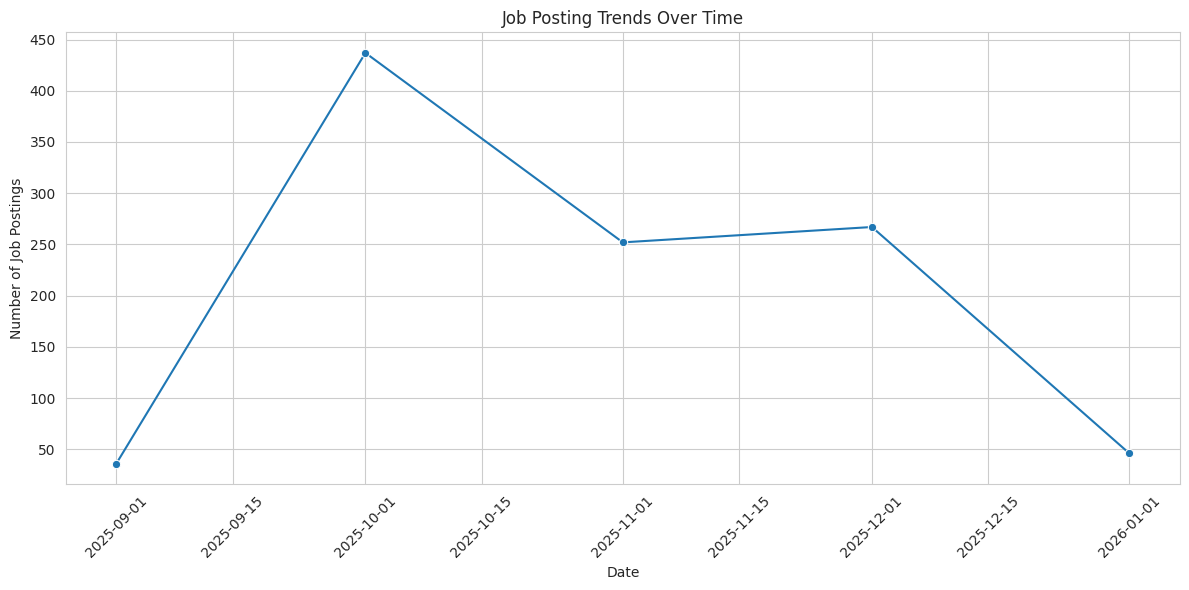

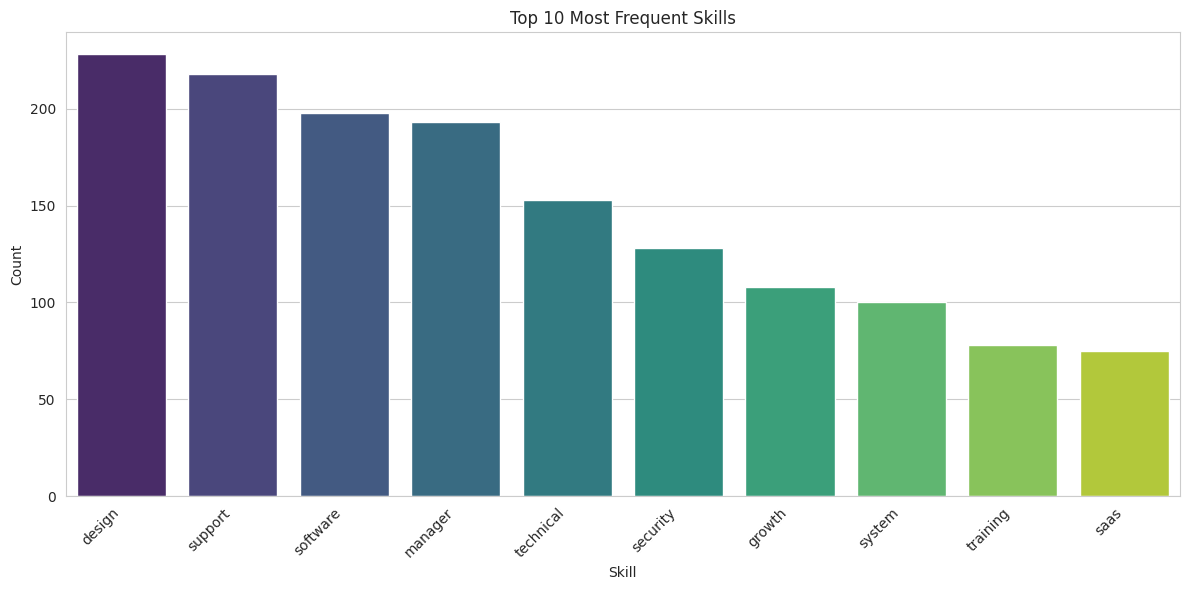

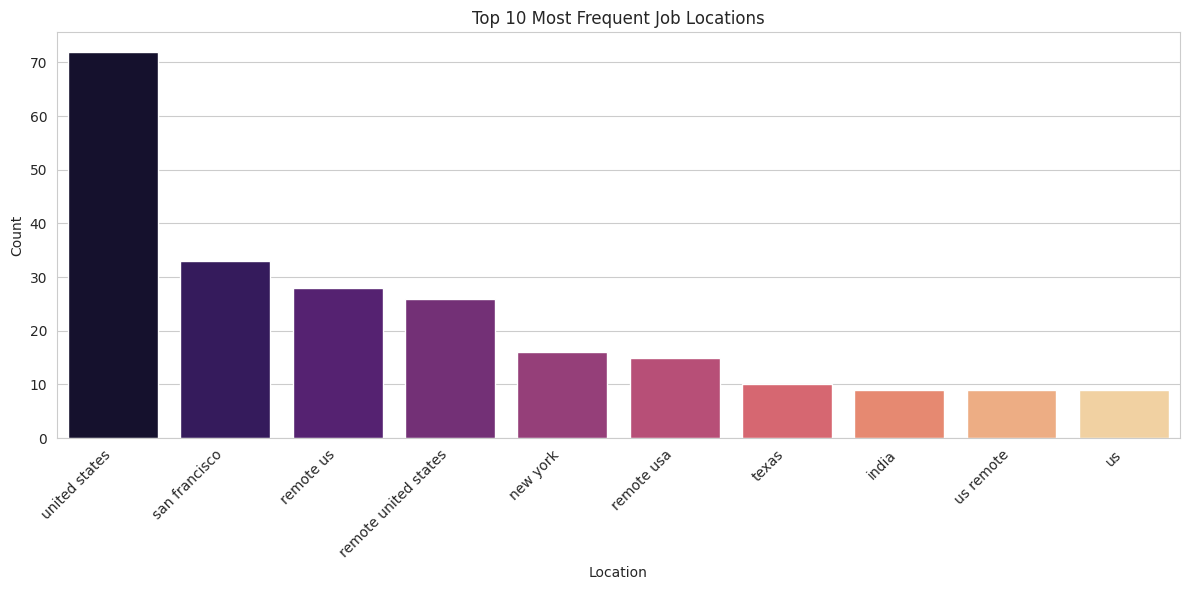

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set plot style
sns.set_style("whitegrid")

# 1. Job Posting Trends Over Time
# Extract year and month as string to avoid PeriodArray/Index conversion warning
df['date_posted_ym'] = df['date_posted'].dt.strftime('%Y-%m')
job_trends = df.groupby('date_posted_ym').size().reset_index(name='count')
# Convert back to datetime for plotting
job_trends['date_posted_month'] = pd.to_datetime(job_trends['date_posted_ym'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='date_posted_month', y='count', data=job_trends, marker='o')
plt.title('Job Posting Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top Skills
top_skills = skills_series.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.index, y=top_skills.values, hue=top_skills.index, palette='viridis', legend=False)
plt.title('Top 10 Most Frequent Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Top Locations
# Function to clean location strings (remove non-ASCII characters and extra spaces)
def clean_location(location_str):
    if isinstance(location_str, str):
        # Explicitly remove non-ASCII characters by encoding/decoding
        cleaned = location_str.encode('ascii', 'ignore').decode('ascii')
        cleaned = re.sub(r'[\W_]+', ' ', cleaned) # Replace non-alphanumeric (including special characters) with space
        cleaned = re.sub(r'\s+', ' ', cleaned).strip() # Replace multiple spaces with single space and strip
        return cleaned.lower()
    return location_str

# Apply the enhanced cleaning function
df['location_normalized'] = df['location'].apply(clean_location)

# Filter out generic locations for a more meaningful analysis
# Ensure generic_locations are also cleaned using the same function for consistent comparison
generic_locations_cleaned = [clean_location(loc) for loc in ['upgrade to premium to see salary', 'probably worldwide', 'worldwide']]
filtered_locations_normalized = df[~df['location_normalized'].isin(generic_locations_cleaned)]['location_normalized']
top_locations = filtered_locations_normalized.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, hue=top_locations.index, palette='magma', legend=False)
plt.title('Top 10 Most Frequent Job Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()